In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

***K-means Clustering***


Let's load the Iris data and assume for a moment that the species column is missing i.e., we have the measured values for sepal length/width and petal length/width but we do not know how many species exists.

Now let's use unsupervised learning i.e., clustering to find out how many species exists. The goal here is to group all similar items into a cluster.

In [2]:
iris = datasets.load_iris()

In [3]:
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
0# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')

In [6]:
iris.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
X = iris.iloc[:,:3]  # independent variables
y = iris.species   # dependent variable

In [9]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [28]:
# K Means Cluster
model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [29]:
model.cluster_centers_

array([[-1.00206653,  0.90625492, -1.30310821],
       [ 1.08926809,  0.0406681 ,  0.94857293],
       [-0.15389144, -0.94941289,  0.29645938]])

We see that the clustering algorithm has assigned a cluster label for each
record. Let’s compare this with the actual species label to understand the
accuracy of grouping similar records.

In [30]:
# since its unsupervised the labels have been assigned
# not in line with the actual lables so let's convert all the 1s to 0s and 0s to 1s
# 2's look fine
iris['pred_species'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

In [31]:
print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))

Accuracy : 0.08666666666666667


In [32]:
print ("Classification report :", metrics.classification_report(iris.species, iris.pred_species))

Classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.27      0.26      0.26        50

    accuracy                           0.09       150
   macro avg       0.09      0.09      0.09       150
weighted avg       0.09      0.09      0.09       150



In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])
iris['pred_species'] = label_encoder.transform(iris['pred_species'])

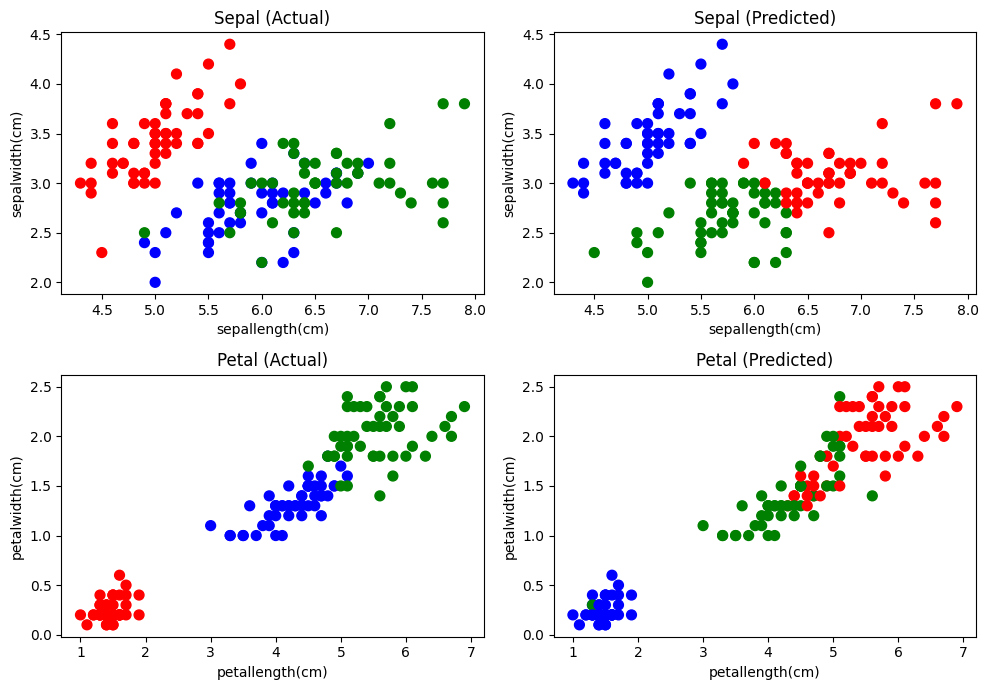

In [34]:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap
colormap = np.array(['red', 'blue', 'green'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.pred_species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.pred_species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

We can see from the above chart that k-means has done a decent job of clustering the
similar labels with an accuracy of 80% compared to the actual labels.

**Finding Value of k**

Two methods are commonly used to determine the value of k.
1. Elbow method
2. Average silhouette method

***Elbow method***

In [35]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [36]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
KM

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [37]:
centroids = [k.cluster_centers_ for k in KM]
centroids

[array([[-1.45235675e-15, -1.65312208e-15, -2.27373675e-15]]),
 array([[ 0.50728948, -0.42663134,  0.65249366],
        [-1.01457897,  0.85326268, -1.30498732]]),
 array([[ 1.08926809,  0.0406681 ,  0.94857293],
        [-1.00206653,  0.90625492, -1.30310821],
        [-0.15389144, -0.94941289,  0.29645938]]),
 array([[-1.35230687,  0.11914427, -1.31439133],
        [ 1.15917263,  0.10322156,  0.99505036],
        [-0.04801838, -0.87798752,  0.3606861 ],
        [-0.74922133,  1.43007001, -1.29759846]]),
 array([[ 0.21290926, -0.49919813,  0.54352819],
        [-1.18221828,  0.49090589, -1.31180781],
        [ 1.26169929,  0.17494954,  1.02508485],
        [-0.45236005, -1.51316008,  0.05229043],
        [-0.59372257,  1.84771271, -1.2833891 ]]),
 array([[ 1.97705575,  0.15576648,  1.44480739],
        [-1.15648001,  0.52663905, -1.31496545],
        [ 0.17468368, -0.59237301,  0.52830388],
        [-0.49005672, -1.5515262 ,  0.01124118],
        [ 0.87775048,  0.17247431,  0.81226183]

In [41]:
# Calculate Euclidean distances between data points and centroids
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
D_k

[array([[1.90939875],
        [1.76638427],
        [1.99470435],
        [1.981499  ],
        [2.09782889],
        [2.32799955],
        [2.16518559],
        [1.8202968 ],
        [2.23290775],
        [1.72140114],
        [2.03082875],
        [1.92997657],
        [1.84710284],
        [2.40764212],
        [2.61255332],
        [3.35114038],
        [2.45013023],
        [1.90939875],
        [2.07872748],
        [2.3197043 ],
        [1.50963855],
        [2.15567443],
        [2.5074694 ],
        [1.57844988],
        [1.82636244],
        [1.6018811 ],
        [1.78068017],
        [1.81468963],
        [1.73955901],
        [1.87922504],
        [1.76415385],
        [1.59933259],
        [2.83118639],
        [2.98130494],
        [1.72140114],
        [1.80716919],
        [1.7785448 ],
        [2.15944396],
        [2.24225434],
        [1.75514431],
        [2.00856492],
        [2.76413644],
        [2.26233103],
        [1.89393092],
        [2.20208075],
        [1

In [39]:
# For each distance matrix, find the index of the closest centroid for each data point
cIdx = [np.argmin(D, axis=1) for D in D_k]
cIdx

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [42]:
# For each distance matrix, calculate the minimum distance for each data point
dist = [np.min(D, axis=1) for D in D_k]
dist

[array([1.90939875, 1.76638427, 1.99470435, 1.981499  , 2.09782889,
        2.32799955, 2.16518559, 1.8202968 , 2.23290775, 1.72140114,
        2.03082875, 1.92997657, 1.84710284, 2.40764212, 2.61255332,
        3.35114038, 2.45013023, 1.90939875, 2.07872748, 2.3197043 ,
        1.50963855, 2.15567443, 2.5074694 , 1.57844988, 1.82636244,
        1.6018811 , 1.78068017, 1.81468963, 1.73955901, 1.87922504,
        1.76415385, 1.59933259, 2.83118639, 2.98130494, 1.72140114,
        1.80716919, 1.7785448 , 2.15944396, 2.24225434, 1.75514431,
        2.00856492, 2.76413644, 2.26233103, 1.89393092, 2.20208075,
        1.84710284, 2.28874845, 2.04295546, 2.06618595, 1.775508  ,
        1.53582024, 0.86062007, 1.43882859, 1.79757509, 1.10137428,
        0.7476147 , 0.95125501, 1.91413301, 1.09580648, 1.13612323,
        2.64381875, 0.29196786, 1.98742754, 0.71732379, 0.47557117,
        1.10464918, 0.53123404, 0.84685481, 2.06386533, 1.31887851,
        0.68068021, 0.68304049, 1.54061087, 0.85

In [43]:
# Calculate the average within-cluster sum of squares
avgWithinSS = [np.sum(d) / X.shape[0] for d in dist]
avgWithinSS

[1.6048336570661383,
 0.9614053124134182,
 0.7711221943483366,
 0.6888748710119177,
 0.621955369512697,
 0.5811800039241137,
 0.5319182514417882,
 0.49449351034529476,
 0.46488774744844696]

In [44]:
# Calculate the within-cluster sum of squares for each cluster
wcss = [sum(d**2) for d in dist]

# Calculate the total sum of squares
tss = sum(pdist(X)**2) / X.shape[0]

# Calculate the between-cluster sum of squares
bss = tss - sum(wcss)

# Calculate the percentage of variance explained
varExplained = (bss / tss) * 100

In [49]:
kIdx = 2

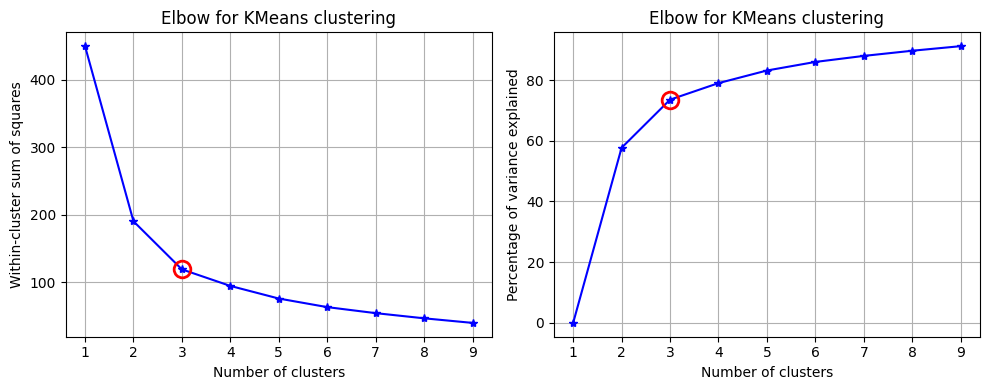

In [51]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your dataset X

K = range(1, 10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / X.shape[0] for d in dist]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2) / X.shape[0]
bss = tss - wcss
varExplained = bss / tss * 100

# Corrected index for kIdx
kIdx = 2

# Elbow curve plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'b*-')  # Change to wcss for within-cluster sum of squares
plt.plot(K[kIdx], wcss[kIdx], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

plt.show()


***Average silhouette method***

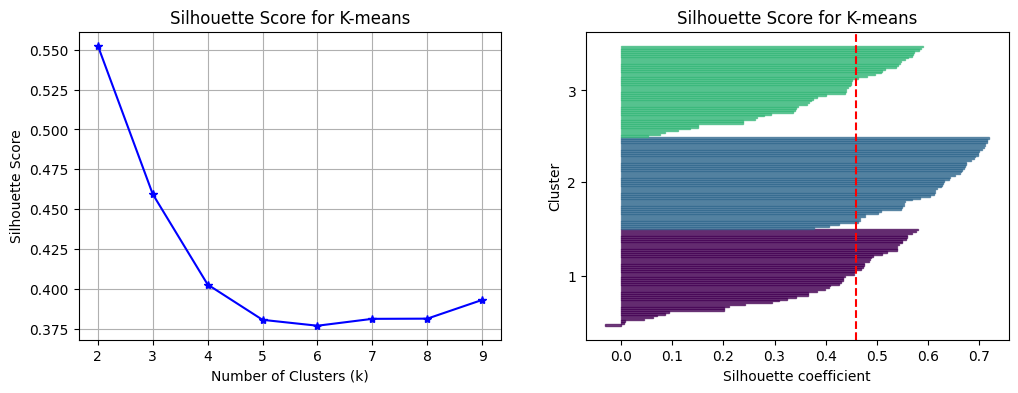

In [54]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

score = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    score.append(silhouette_score(X, labels, metric='euclidean'))

# Set the size of the plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), score, 'b*-')
plt.grid(True)
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.title("Silhouette Score for K-means")

# Initialize the clusterer with n_clusters value and a random generator
model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
cluster_labels = model.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, cluster_labels)

# Adjusted subplot indexing
plt.subplot(1, 2, 2)

y_lower, y_upper = 0, 0
yticks = []
for i in range(3):  # Adjusted to the specific number of clusters (3 in this case)
    c_silhouette_vals = silhouette_vals[cluster_labels == i]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = cm.viridis(float(i) / 3)  # Replaced 'spectral' with 'viridis'
    plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)

plt.yticks(yticks, range(1, 4))  # Adjusted to the specific number of clusters (3 in this case)

# The vertical line for the average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title("Silhouette Score for K-means")
plt.show()

***Hierarchical Clustering***

In [56]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Cluster
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [57]:
iris['pred_species'] =  model.labels_

print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print ("Classification report :", metrics.classification_report(iris.species, iris.pred_species))

Accuracy : 0.7733333333333333
Classification report :               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.64      0.74      0.69        50
           2       0.70      0.60      0.65        50

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



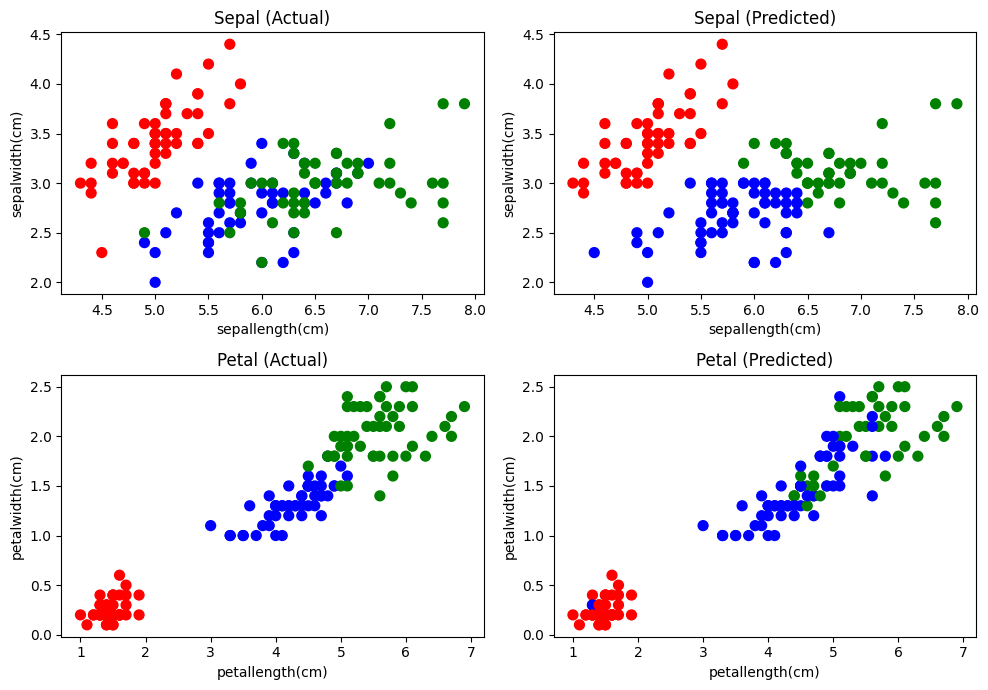

In [58]:
# Set the size of the plot
plt.figure(figsize=(10,7))
 
# Create a colormap
colormap = np.array(['red', 'blue', 'green'])

# Plot Sepal
plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')
 
plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.pred_species], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.pred_species],marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()

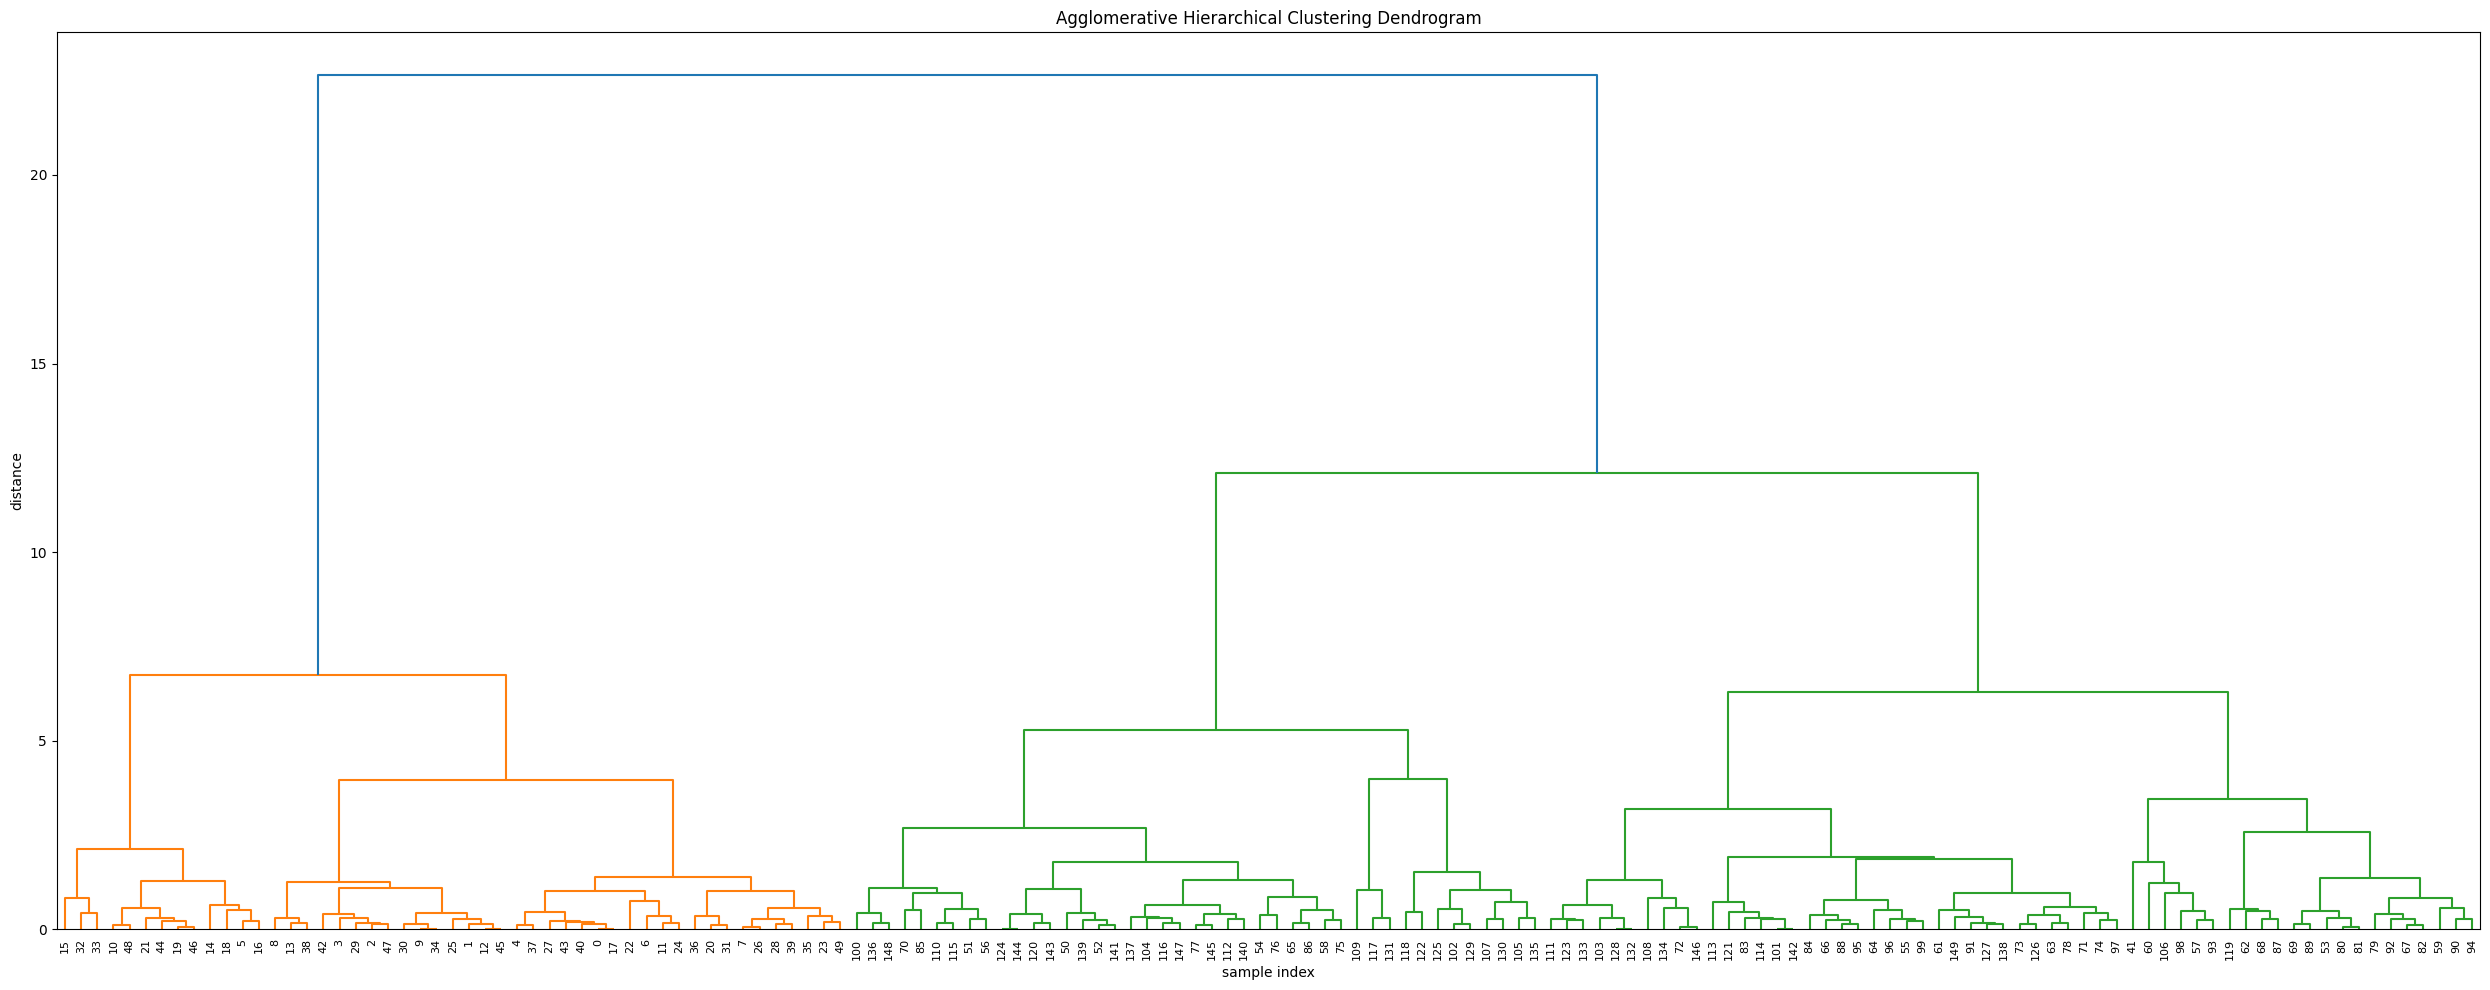

In [59]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.tight_layout()